# Strategic Product Recommendation Engine for Digital Marketplaces
### Project by Razi Haider

## Recommendation System Overview

A well-developed recommendation system enhances the shopping experience on a website, leading to improved customer acquisition and retention.

The recommendation system is structured into three components, tailored to different stages of the customer's journey:

1. **Part I: Popularity-Based Recommendations** - For new customers, the system suggests the most popular products on the website.
2. **Part II: Collaborative Filtering** - For returning customers, the system utilizes purchase history and user ratings to recommend products similar to those previously bought.
3. **Part III: Initial Setup Recommendations** - For e-commerce websites without product ratings, the system initially recommends top-selling products.

Initially, new visitors are presented with popular items. After making a purchase, the system updates recommendations based on the customer’s purchase history and ratings from similar users, employing collaborative filtering techniques.


### Recommendation System - Part I

### Popularity-Based Recommendation for New Customers

A popularity-based recommendation system is highly effective for engaging new customers by showcasing the most popular products available on a business's website. This approach is especially valuable for initiating a recommendation engine during the cold start phase.

**Dataset:** [Amazon Product Review Dataset from kaggle](https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings)


#### Loading and Inspecting the Data

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
# matplotlib inline
plt.style.use("ggplot")

In [6]:
# Load the dataset
amazon_ratings = pd.read_csv('ratings_Beauty.csv')

In [7]:
# Display the dataset
amazon_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [8]:
# Display descriptive statistics
print(amazon_ratings.describe())

             Rating     Timestamp
count  2.023070e+06  2.023070e+06
mean   4.149036e+00  1.360389e+09
std    1.311505e+00  4.611860e+07
min    1.000000e+00  9.087552e+08
25%    4.000000e+00  1.350259e+09
50%    5.000000e+00  1.372810e+09
75%    5.000000e+00  1.391472e+09
max    5.000000e+00  1.406074e+09


In [9]:
# Get the summary of the dataset
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


#### Data Cleaning

In [11]:
# Check for missing values
print(amazon_ratings.isnull().sum())

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


In [12]:
# Check for duplicate values 
print(amazon_ratings.duplicated().sum())

0


##### *The dataset is complete with no missing values and duplicated values.*

#### Most Popular Products Based on Number of Ratings

In [15]:
# Most 50 popular products based on the number of ratings
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(50)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


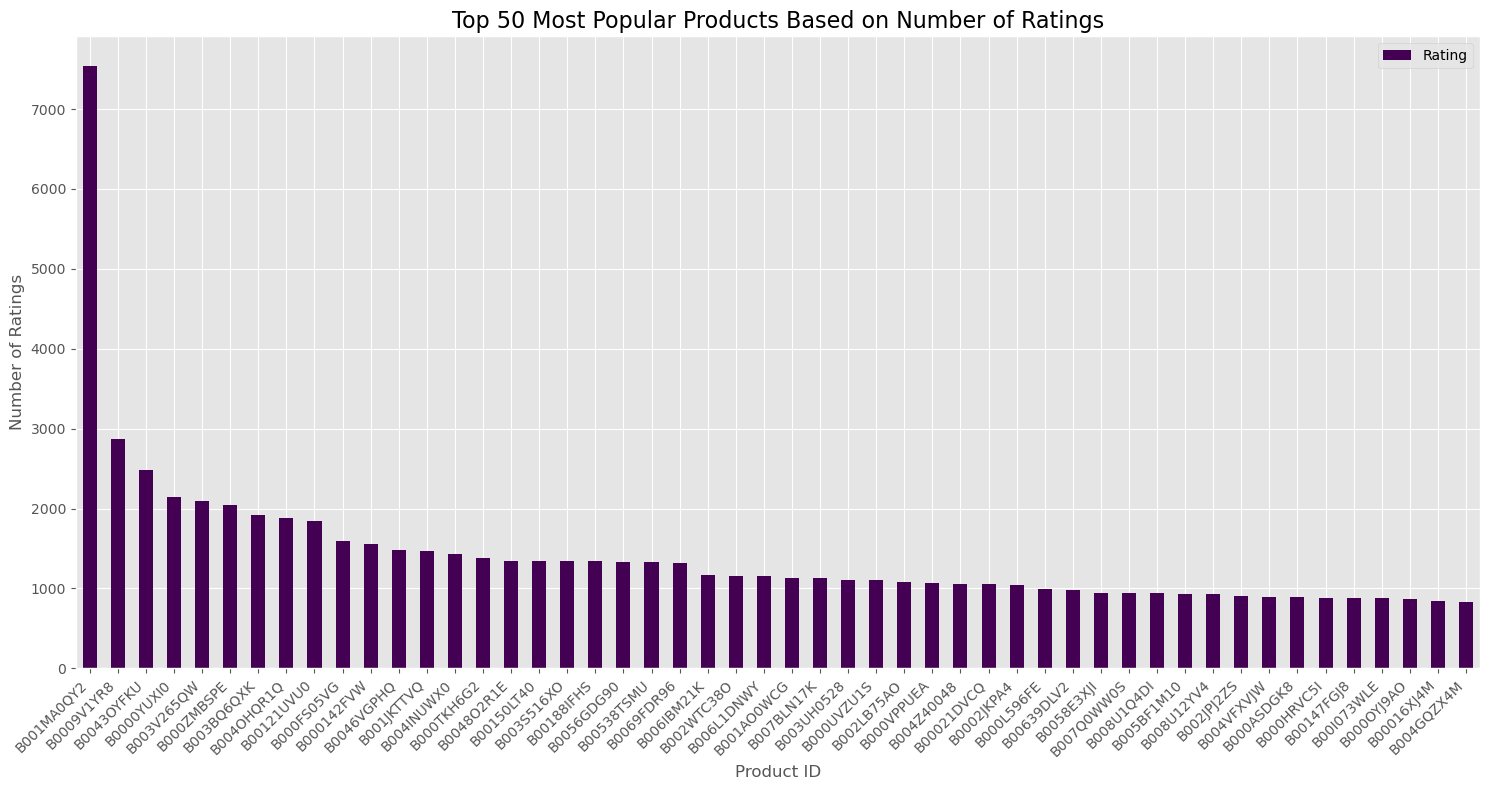

In [16]:
# Plot a bar chart of the top 50 most popular products based on the number of ratings
ax = most_popular.head(50).plot(kind='bar', figsize=(15, 8), color=plt.cm.viridis(np.linspace(0, 1, 50)))

ax.set_title('Top 50 Most Popular Products Based on Number of Ratings', fontsize=16)
ax.set_xlabel('Product ID', fontsize=12)
ax.set_ylabel('Number of Ratings', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### *The graph displays the most popular products sold by the business, ranked in descending order of sales. For instance, Product ID # B001MA0QY2 leads with over 7,000 sales, while the next most popular, Product ID # B0009V1YR8, has 3,000 sales.*

### Recommendation System - Part II

### Model-Based Collaborative Filtering System



This system recommends items based on a user's purchase history and the similarity of ratings from other users who have purchased similar products. The model-based collaborative filtering approach is chosen for its ability to predict products for individual users by identifying patterns from multiple users' preferences.


#### Data Preparation

In [20]:
# Subset of Amazon Ratings
amazon_ratings1 = amazon_ratings.head(10000)
amazon_ratings1

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
9995,A9V4K2YJ2DWTQ,B000052YQ2,3.0,1396396800
9996,A3033CXHQ0NF8J,B000052YQ2,5.0,1291248000
9997,A1Z66KHEXSF3L5,B000052YQ2,3.0,1361577600
9998,A1Y7D2DRVBN59D,B000052YQ2,5.0,1402099200


#### Utility Matrix Creation

In [22]:
# Create a utility matrix for ratings with users as rows and products as columns, filling missing values with 0
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### *A utility matrix displays user-item preferences, with rows representing users and columns representing items. Each cell indicates a rating or preference. Due to users interacting with only a subset of items, the matrix is sparse, with many cells containing unknown values. As expected, the utility matrix obtained is sparse; unknown values have been filled with 0.*

In [24]:
# Display the shape (number of rows and columns) of the ratings utility matrix
ratings_utility_matrix.shape

(9697, 886)

In [25]:
# Transpose the ratings utility matrix to have products as rows and users as columns
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Display the shape (number of rows and columns) of the transposed ratings utility matrix
X.shape

(886, 9697)

In [27]:
# Create a copy of the transposed ratings utility matrix
X1 = X

#### Dimensionality Reduction


In [29]:
# Apply Truncated Singular Value Decomposition (SVD) to reduce the dimensionality of the matrix to 10 components
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

#### Correlation Analysis

In [31]:
# Compute the correlation matrix of the decomposed matrix to understand the relationships between components
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

#### Recommendation Generation

In [33]:
# Retrieve the index value for the random index of the transposed ratings utility matrix
import random

random_index = random.randint(0, 885)
random_product = X.index[random_index]
print(random_product)

B000001K4R


Note: Here, we are taking any random_product for analysis. 

In [35]:
# Find the index of a specific product ID in the list of product names
i = random_product

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

648

In [36]:
# Extract the correlation values for the specific product ID from the correlation matrix
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [37]:
# Recommend products with a correlation score greater than 0.90 to the specific product
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['5357956227',
 '6040652705',
 '753865058X',
 '7899120217',
 '8901134322',
 '9746427962',
 '9758086243',
 '9788072097',
 '9788073247',
 '978807328X']

In [38]:
print("Here are the top 10 products to be displayed by the recommendation system to the customer who bought", random_product, ", based on the purchase history of other customers on the website:", Recommend[0:10])


Here are the top 10 products to be displayed by the recommendation system to the customer who bought B000001K4R , based on the purchase history of other customers on the website: ['5357956227', '6040652705', '753865058X', '7899120217', '8901134322', '9746427962', '9758086243', '9788072097', '9788073247', '978807328X']


### Recommendation System - Part III
### Initial Setup Recommendations
For businesses lacking user-item purchase history, a search engine-based recommendation system can be implemented. Recommendations can be generated by analyzing and clustering product descriptions textually.

**Dataset:** [Home Depots Product Dataset from Kaggle](https://www.kaggle.com/c/home-depot-product-search-relevance/data?select=product_descriptions.csv.zip)


#### Loading and Inspecting the Data

In [41]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [42]:
# Load the dataset
product_descriptions = pd.read_csv('product_descriptions.csv')

In [43]:
# Display the first few rows of the dataset
product_descriptions

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
...,...,...
124423,224424,Create a neat yet stylish storage space for or...
124424,224425,Our Bullnose Adirondack Chair Cushions fit Adi...
124425,224426,Joist hangers are designed to provide support ...
124426,224427,These socket cap screws are ideal for applicat...


In [44]:
# Display descriptive statistics
print(product_descriptions.describe())

         product_uid
count  124428.000000
mean   162214.500000
std     35919.413985
min    100001.000000
25%    131107.750000
50%    162214.500000
75%    193321.250000
max    224428.000000


In [45]:
# Get the summary of the dataset
product_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_uid          124428 non-null  int64 
 1   product_description  124428 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


#### Data Cleaning

In [47]:
# Check for missing values
print(product_descriptions.isnull().sum())

product_uid            0
product_description    0
dtype: int64


In [48]:
# Check for duplicate values 
print(product_descriptions.duplicated().sum())

0


##### *The dataset is complete with no missing values and duplicated values.*

#### Initial Sample of Product Descriptions

In [51]:
product_descriptions1 = product_descriptions.head(500)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

#### Feature Engineering
*Feature extraction from product descriptions. Converting the text in product description into numerical data for analysis*

In [53]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Clustering Product Descriptions Using K-Means

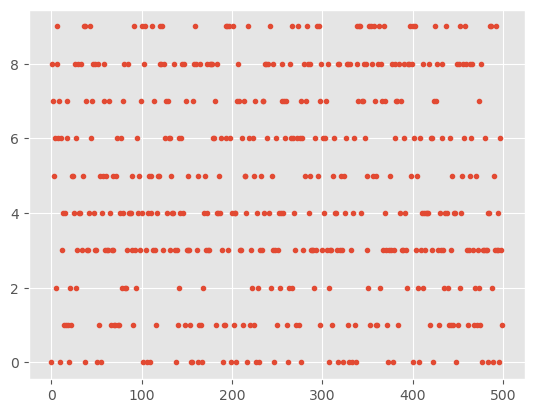

In [55]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [56]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [57]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 water
 insulation
 tape
 fiberglass
 wash
 energy
 easy
 oil
 helps
 roof
Cluster 1:
 air
 window
 power
 ft
 cooling
 control
 fan
 installation
 sq
 cooking
Cluster 2:
 storage
 shelves
 lbs
 steel
 shelf
 easy
 solid
 unit
 capacity
 duty
Cluster 3:
 wood
 door
 painted
 proposition
 nbsp
 residents
 california
 65
 moulding
 primed
Cluster 4:
 light
 watt
 led
 bulb
 cabinet
 lighting
 bulbs
 fixture
 nickel
 low
Cluster 5:
 frame
 piece
 patio
 toilet
 dining
 cushions
 set
 wicker
 azek
 chairs
Cluster 6:
 sheet
 plate
 cut
 aluminum
 used
 non
 wall
 projects
 easy
 tread
Cluster 7:
 watering
 garden
 stake
 plants
 ft
 fence
 lawn
 landscape
 head
 metal
Cluster 8:
 water
 tank
 year
 warranty
 volt
 gal
 heater
 flush
 limited
 easy
Cluster 9:
 wall
 ft
 color
 use
 tile
 finish
 resistant
 vary
 paint
 rug


#### Recommendation Generation

In [59]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [60]:
show_recommendations("bulb")

Cluster 4:
 light
 watt
 led
 bulb
 cabinet
 lighting
 bulbs
 fixture
 nickel
 low


In [61]:
show_recommendations("paint")

Cluster 9:
 wall
 ft
 color
 use
 tile
 finish
 resistant
 vary
 paint
 rug


In [62]:
show_recommendations("steel")

Cluster 2:
 storage
 shelves
 lbs
 steel
 shelf
 easy
 solid
 unit
 capacity
 duty


Once a cluster is found using the user's search terms, the recommendation system can show items from that specific product cluster based on their descriptions. If a word appears in multiple clusters, the algorithm selects the cluster where the word occurs most frequently.

### Summary

The Initial Setup Recommendations approach is ideal for businesses launching an e-commerce site without any initial user-item purchase or rating history. It offers relevant recommendations to users from the beginning. As the site gathers purchase history, the recommendation engine can transition to model-based collaborative filtering techniques for enhanced recommendations.